In [5]:
# %cd AIVN_learning_path/Research/Eco/Classical
!ls

ARIMA.ipynb  dataset.txt


In [81]:
import pandas as pd
path = './dataset.txt'

df = pd.read_csv(path)

df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


**Find d**


In [82]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 3.145186
p-value: 1.000000


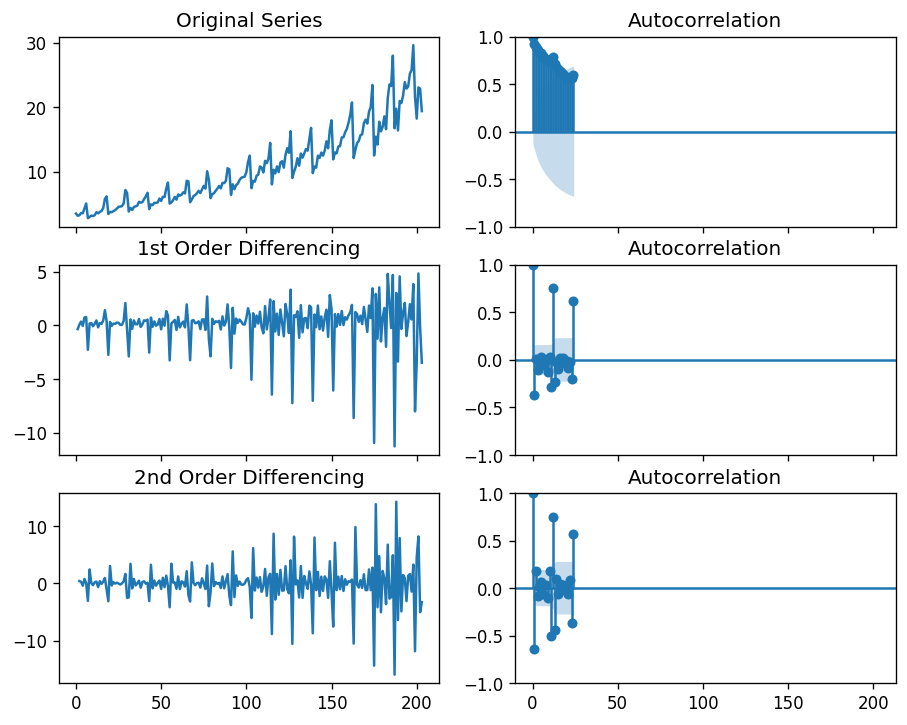

In [83]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [84]:
result = adfuller(df.value.diff().diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -10.292305
p-value: 0.000000


**Find p**

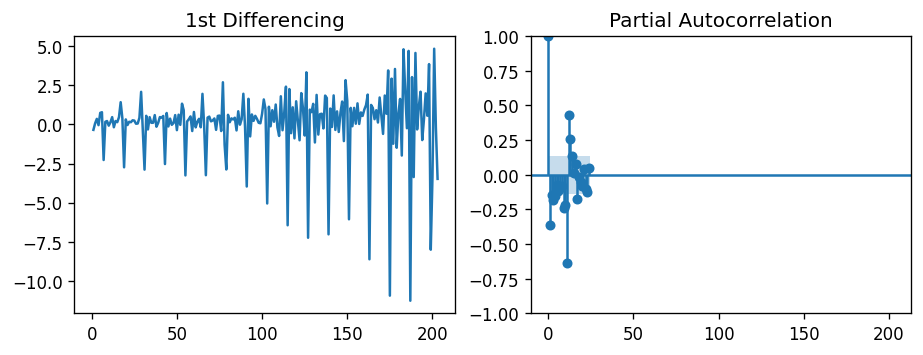

In [85]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.value.diff().dropna(), ax=axes[1])

plt.show()


**Find q**

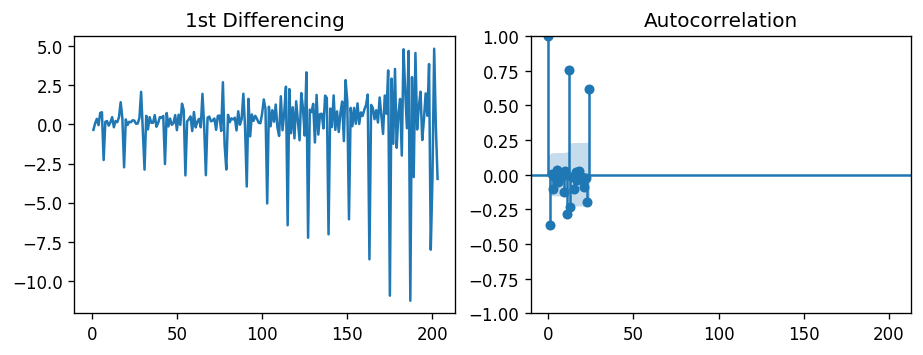

In [116]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.value.diff().dropna(), ax=axes[1])

plt.show()

**ARIMA**

In [86]:
from statsmodels.tsa.arima.model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df.value, order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  204
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -424.570
Date:                Fri, 18 Jul 2025   AIC                            857.140
Time:                        09:53:02   BIC                            870.393
Sample:                             0   HQIC                           862.502
                                - 204                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4178      0.356      1.174      0.240      -0.280       1.115
ma.L1         -0.9546      0.377     -2.531      0.011      -1.694      -0.215
ma.L2          0.0969      0.272      0.356      0.7

In [87]:
model = ARIMA(df.value, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  204
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -424.762
Date:                Fri, 18 Jul 2025   AIC                            855.524
Time:                        09:53:04   BIC                            865.463
Sample:                             0   HQIC                           859.545
                                - 204                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3009      0.094      3.195      0.001       0.116       0.485
ma.L1         -0.8300      0.048    -17.204      0.000      -0.925      -0.735
sigma2         3.8327      0.259     14.790      0.0

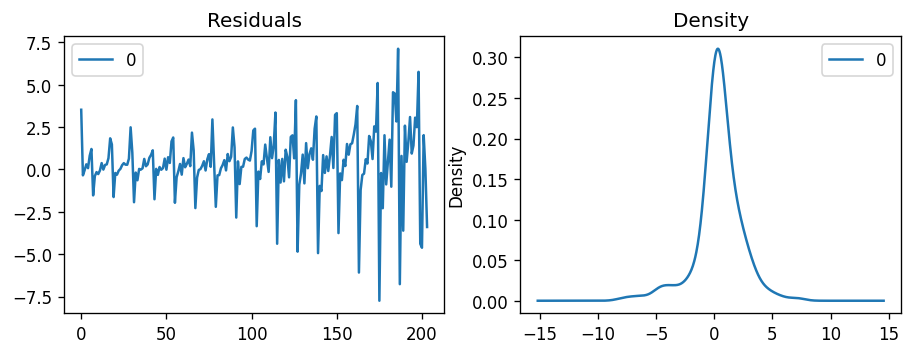

In [88]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

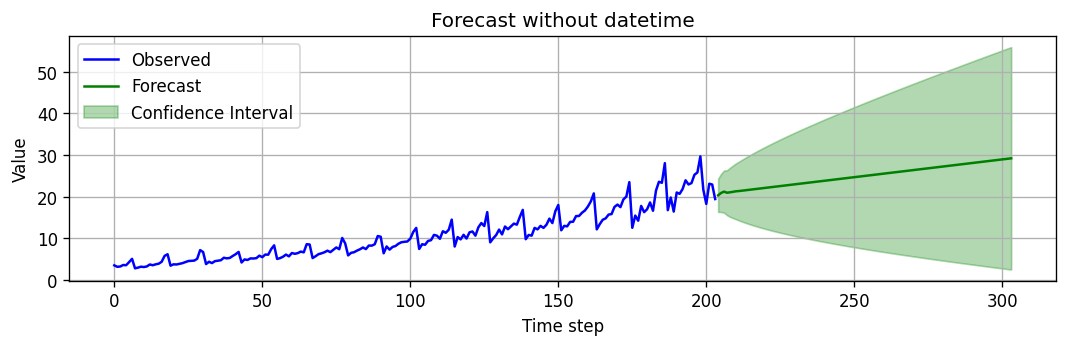

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Giả sử bạn có một chuỗi dữ liệu đơn giản
y = df['value'].values  # Không dùng df.index nữa

# Fit mô hình SARIMAX
model = SARIMAX(y, order=(3, 2, 1))
model_fit = model.fit(disp=False)

# Dự báo 10 bước tiếp theo
n_forecast = 100
forecast_result = model_fit.get_forecast(steps=n_forecast)

# Lấy giá trị trung bình và dải tin cậy
forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# Tạo index mới chỉ dùng số thứ tự
x_full = np.arange(len(y) + n_forecast)
x_obs = np.arange(len(y))
x_pred = np.arange(len(y), len(y) + n_forecast)

# Vẽ kết quả
plt.plot(x_obs, y, label='Observed', color='blue')
plt.plot(x_pred, forecast, label='Forecast', color='green')
plt.fill_between(x_pred, conf_int[:, 0], conf_int[:, 1], color='green', alpha=0.3, label='Confidence Interval')
plt.legend()
plt.grid(True)
plt.xlabel("Time step")
plt.ylabel("Value")
plt.title("Forecast without datetime")
plt.tight_layout()
plt.show()


In [72]:
print(forecast_ci)

            lower value  upper value
2008-07-01 -1960.164871  1960.164871
2008-08-01 -1960.165850  1960.165850
2008-09-01 -1960.166830  1960.166830
2008-10-01 -1960.167810  1960.167810
2008-11-01 -1960.168790  1960.168790
2008-12-01 -1960.169770  1960.169770
2009-01-01 -1960.170750  1960.170750
2009-02-01 -1960.171730  1960.171730
2009-03-01 -1960.172710  1960.172710
2009-04-01 -1960.173689  1960.173689


In [98]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.value[:85]
test = df.value[85:]

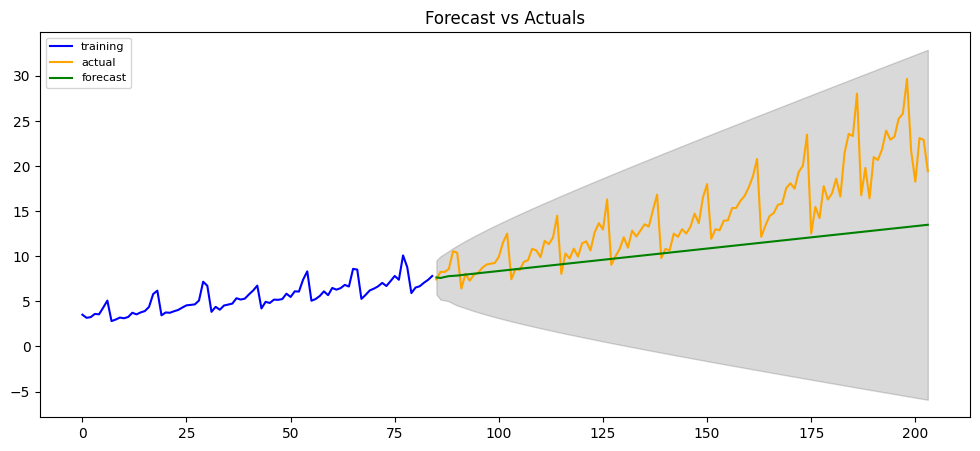

Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   85
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -116.886
Date:                Fri, 18 Jul 2025   AIC                            243.771
Time:                        10:13:15   BIC                            255.865
Sample:                             0   HQIC                           248.630
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2205      0.194     -1.139      0.255      -0.600       0.159
ar.L2         -0.3436      0.141     -2.443      0.015      -0.619      -0.068
ar.L3         -0.0936      0.252     

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

# Chia dữ liệu
train = df.value[:85]
test = df.value[85:]

# Thử các order khác nhau nếu (1,1,1) không hiệu quả
# Có thể thử (3,2,1) như code gốc hoặc auto-detect
from statsmodels.tsa.arima.model import ARIMA



model = ARIMA(train, order=(3, 2, 1))
fitted = model.fit()

# Dự báo với API mới
forecast_obj = fitted.get_forecast(steps=len(test))
fc = forecast_obj.predicted_mean
conf_int = forecast_obj.conf_int(alpha=0.05)  # 95% confidence interval

# Tạo pandas series với đúng index
fc_series = pd.Series(fc.values, index=test.index)
lower_series = pd.Series(conf_int.iloc[:, 0].values, index=test.index)
upper_series = pd.Series(conf_int.iloc[:, 1].values, index=test.index)

# Vẽ biểu đồ giống như API cũ
plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train, label='training', color='blue')
plt.plot(test, label='actual', color='orange')
plt.plot(fc_series, label='forecast', color='green')
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=0.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Kiểm tra model summary
print("Model Summary:")
print(fitted.summary())

# Tính toán độ chính xác
mae = np.mean(np.abs(fc_series - test))
mse = np.mean((fc_series - test) ** 2)
rmse = np.sqrt(mse)

print(f"\nModel Performance:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

In [115]:
import numpy as np
from statsmodels.tsa.stattools import acf
import pandas as pd

def forecast_accuracy(forecast, actual):
    """
    Tính toán các chỉ số đánh giá độ chính xác của dự báo

    Parameters:
    forecast: array-like, giá trị dự báo
    actual: array-like, giá trị thực tế

    Returns:
    dict: các chỉ số đánh giá
    """

    # Chuyển đổi về numpy array và đảm bảo cùng shape
    forecast = np.asarray(forecast).flatten()
    actual = np.asarray(actual).flatten()

    # Tránh chia cho 0
    actual_nonzero = actual.copy()
    actual_nonzero[actual_nonzero == 0] = np.finfo(float).eps

    # Tính các chỉ số
    mape = np.mean(np.abs(forecast - actual) / np.abs(actual_nonzero)) * 100  # MAPE (%)
    me = np.mean(forecast - actual)                                           # ME
    mae = np.mean(np.abs(forecast - actual))                                  # MAE
    mpe = np.mean((forecast - actual) / actual_nonzero) * 100                 # MPE (%)
    rmse = np.sqrt(np.mean((forecast - actual) ** 2))                         # RMSE

    # Correlation
    if len(forecast) > 1 and len(actual) > 1:
        corr = np.corrcoef(forecast, actual)[0, 1]
    else:
        corr = np.nan

    # Min-Max ratio
    mins = np.minimum(forecast, actual)
    maxs = np.maximum(forecast, actual)
    # Tránh chia cho 0
    maxs_nonzero = maxs.copy()
    maxs_nonzero[maxs_nonzero == 0] = np.finfo(float).eps
    minmax = 1 - np.mean(mins / maxs_nonzero)

    # ACF1 - autocorrelation của residuals
    residuals = forecast - actual
    if len(residuals) > 1:
        try:
            acf_result = acf(residuals, nlags=1, fft=False)
            acf1 = acf_result[1] if len(acf_result) > 1 else 0
        except:
            acf1 = 0
    else:
        acf1 = 0

    return {
        'mape': mape,
        'me': me,
        'mae': mae,
        'mpe': mpe,
        'rmse': rmse,
        'acf1': acf1,
        'corr': corr,
        'minmax': minmax
    }

# Sử dụng function
# Giả sử bạn có fc_series và test từ code ARIMA trước đó
try:
    # Sử dụng với pandas Series
    accuracy = forecast_accuracy(fc_series, test)

    # Hoặc sử dụng với numpy arrays
    # accuracy = forecast_accuracy(fc_series.values, test.values)

    print("Forecast Accuracy Metrics:")
    print("-" * 30)
    for key, value in accuracy.items():
        if isinstance(value, float):
            print(f"{key.upper():>6}: {value:.4f}")
        else:
            print(f"{key.upper():>6}: {value}")

except Exception as e:
    print(f"Error: {e}")
    print("Đảm bảo bạn có fc_series và test từ code ARIMA trước đó")

Forecast Accuracy Metrics:
------------------------------
  MAPE: 23.2665
    ME: -3.8807
   MAE: 3.9817
   MPE: -21.9304
  RMSE: 5.3072
  ACF1: 0.6960
  CORR: 0.8737
MINMAX: 0.2319
